# 결측치
- 누락값, 비어있는 값
- 결측치를 삭제하기 or 대체하기 (항상 기준이 필요함)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame({'이름':['홍길동','김영희','배철수'],
                 '성적':[np.nan,100,30],
                   '등급':['B',np.nan,'C']})

In [5]:
df

,이름,성적,등급
0,홍길동,NaN,B
1,김영희,100.0,NaN
2,배철수,30.0,C


In [7]:
#결측치 보는법
df.isna().sum()   

이름    0
성적    1
등급    1
dtype: int64

## 결측치 삭제하는 방법
- df.dropna(subset=['컬럼'])

In [9]:
df.dropna()   #결측치(na값)가 있는 행을 모두 삭제 

,이름,성적,등급
2,배철수,30.0,C


In [8]:
#성적에 결측치가 있는 행을 전부 삭제
df.dropna(subset=['성적'])

,이름,성적,등급
1,김영희,100.0,NaN
2,배철수,30.0,C


## 결측치 대체하는 방법
- fillna()
- 통계치를 구할 때나 값의 개수를 셀 때 na값은 반영 안됨

In [47]:
df

,이름,성적,등급
0,홍길동,NaN,B
1,김영희,100.0,NaN
2,배철수,30.0,C


In [51]:
df['성적']=df['성적'].fillna(50)  #값 넣기

In [52]:
df

,이름,성적,등급
0,홍길동,50.0,B
1,김영희,100.0,NaN
2,배철수,30.0,C


- df['성적']=df['성적'].fillna(df_mean)   

In [68]:
df['성적']=df['성적'].fillna(df['성적'].mean())   #변수화로 넣기

In [69]:
df

,이름,성적,등급
0,홍길동,65.0,B
1,김영희,100.0,NaN
2,배철수,30.0,C


In [75]:
df['성적']= df['성적'].fillna((65+15)/2)   #식으로 넣기

In [76]:
df

,이름,성적,등급
0,홍길동,40.0,B
1,김영희,100.0,NaN
2,배철수,30.0,C


## 타이타닉 데이터

In [77]:
import seaborn as sns

In [78]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [79]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 결측치들을 시각화를 통해 분포 확인

<AxesSubplot:xlabel='pclass', ylabel='survived'>

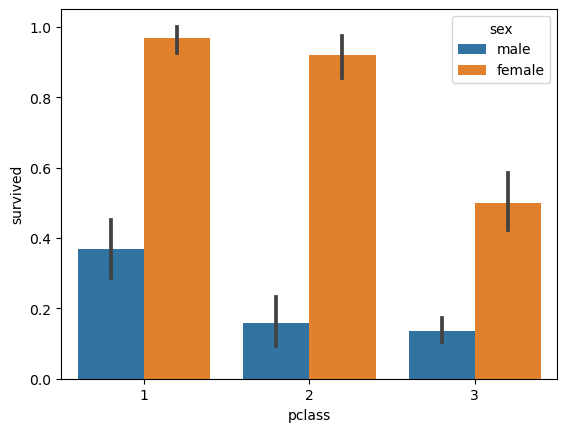

In [81]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

## 인코딩
- 문자열 데이터 -> 수치형 데이터
- 원핫인코딩 : 0과 1로 표현하는 것
- 레이블인코딩 : 숫자데이터를 순서척도로 바꾸어 숫자로 만드는 것

In [84]:
from sklearn.preprocessing import LabelEncoder

In [86]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [89]:
# 원핫 인코딩
pd.get_dummies(df['sex'])   

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1
